<a href="https://colab.research.google.com/github/markdgabor/CCS8/blob/main/Lab_Challenge_4_Gabor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas numpy matplotlib

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

import numpy as np

iris = load_iris()
x,y = iris.data, iris.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import KFold
model = DecisionTreeClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=kfold)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.91666667 1.         0.91666667 0.79166667 1.        ]
Mean Accuracy: 0.925


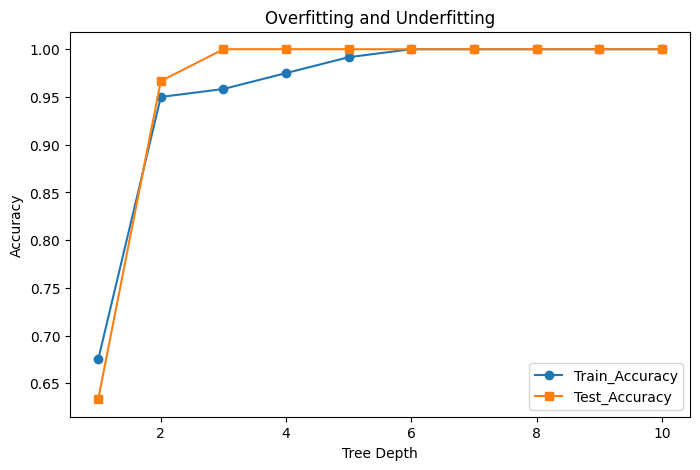

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

train_scores =[]
test_scores = []
depths = range(1,11)

for depth in depths:
  model = DecisionTreeClassifier(max_depth=depth)
  model.fit(x_train, y_train)
  train_scores.append(accuracy_score(y_train, model.predict(x_train)))
  test_scores.append(accuracy_score(y_test, model.predict(x_test)))

plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, label='Train_Accuracy', marker='o')
plt.plot(depths, test_scores, label='Test_Accuracy', marker='s')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Overfitting and Underfitting')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
fr_model = RandomForestClassifier(n_estimators=100)

# Fit both models:
log_model.fit(x_train, y_train)
fr_model.fit(x_train, y_train) # This line was missing

log_train_score = accuracy_score(y_train, log_model.predict(x_train))
log_test_score = accuracy_score(y_test, log_model.predict(x_test))
rf_train_score = accuracy_score(y_train, fr_model.predict(x_train))
rf_test_score = accuracy_score(y_test, fr_model.predict(x_test))

print(f"Logistic Regression - Train: {log_train_score:.3f}, test :{log_test_score:.3f}") # Corrected variable names here
print(f"Random Forest - Train: {rf_train_score:.3f}, test :{rf_test_score:.3f}") # Corrected variable names here

Logistic Regression - Train: 0.975, test :1.000
Random Forest - Train: 1.000, test :1.000
